# <span style="color:blue">**Women in Tech - Colleges**</span><br>

## <span style="color:blue">**HND in Software Development**</span><br>

Author: Ester Giménez Mojón

SQA awards HND courses in "Computing: Software Development".<br>

This notebook presents 15 years of data extracted from the website of INFACT, the Scottish Founding Council, https://stats.sfc.ac.uk/infact/QueryBuilder/Basic.<br>

Their website has three types of queries for extracting data from colleges in Scotland. In this work, I used the Basic and the Complex queries. More information about the queries is in the report.<br>

The two queries were used for every year, from 2005-2006 to 2019-2020, for every college and every geographical area.<br>

When both queries are compared, the totals with the complex query are bigger than the totals obtained with the basic query. The reason is a highly unusual number of "5" in the column of the girls and also in the columns "Other" and "Inf ref/pr not say". We believe that the real totals are found in the basic query, so we calculated the difference between both totals (column "Difference"). The totals with the basic query are **less or the same** as the totals with the complex query, never bigger.<br>

In order for the totals to match the "real" total, the number of girls and/or the numbers in the columns "Other" and "Inf ref/pr not say", had to be modified.<br>

The number of females in the complex query is in column "Females" and the modified number in the column "Female real".<br>

As a result, the true gender distribution is unknown, because decisions had to be made on which totals were correct and which columns needed to be modified. Even without modifications, it is clear that the proportion of girls vs boys in colleges is 1:8 to 1:15, depending on the college and the year. In order to present the assumptions more clearly, the graphs show both the number of females with the complex query (in red) and the number with the basic query (in blue).<br>

In [2]:
import pandas as pd
import janitor
import geopandas as gpd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os.path as path

# HND Computing: Software Development
cs_soft = pd.read_csv("https://github.com/EsterGM/Women-In-Tech/tree/main/Colleges/HND-gender-SoftwareDev2.csv")

### DESCRIPTION OF THE DATASET

There are 168 lines for all colleges that offered Software Development courses since 2005 in all Scotland. The totals sum up the numbers of all colleges for every given year.<br>

For females, the 25%, 50% and 75% show "5", which is unusual. The column "Female real" shows 1, 2 and 5, respectively, which seems more logical. The differences range between 1 to 5 girls, which is a very high difference, taking into account that what we assume to be the "wrong total" ranges from 5 to 20. Ranges are:<br>

 - Boys range from 5 to 152.<br>
 - Girls range from 1 to 20.<br>
 
 This makes 1 girl for every 5 to 7.6 boys (as per the maximums of the 15 years).<br>

In [3]:
cs_soft.describe()

,Year,Male,Female,Inf ref/pr not say,Difference,Female real
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2011.839286,32.702381,5.083333,0.041667,1.619048,3.464286
std,4.236045,29.710290,3.414335,0.228354,1.726197,3.861204
min,2005.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,12.000000,5.000000,0.000000,0.000000,1.000000
50%,2012.000000,20.500000,5.000000,0.000000,1.000000,2.000000
75%,2015.000000,47.000000,5.000000,0.000000,3.000000,5.000000
max,2019.000000,152.000000,20.000000,2.000000,5.000000,20.000000


In [4]:
cs_soft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Year                                      168 non-null    int64 
 1   College Region (Glasgow, Highlands, etc)  168 non-null    object
 2   College names (actual for each year)      168 non-null    object
 3   Male                                      168 non-null    int64 
 4   Female                                    168 non-null    int64 
 5   Inf ref/pr not say                        168 non-null    int64 
 6   Difference                                168 non-null    int64 
 7   Female real                               168 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 10.6+ KB


#### NUMBER OF BOYS/GIRLS IN SOFTWARE DEVELOPMENT COURSES BY REGIONS, REGARDLESS OF THE YEAR / COLLEGE.<br>

In [5]:
# Set year as index
cs_soft = cs_soft.set_index("Year", append = False)
# Rename the columns
cs_renamed = cs_soft.rename(index=str, columns={'College Region (Glasgow, Highlands, etc)' : 'region', 'College names (actual for each year)' : 'college'})
# group the dataset by region
grouped1 = cs_renamed.groupby('region')
grouped11= grouped1.agg(np.sum)
grouped11

,Male,Female,Inf ref/pr not say,Difference,Female real
region,,,,,
Aberdeen and Aberdeenshire,834,111,0,19,92
Ayrshire,104,35,0,26,9
Dundee and Angus,646,82,2,17,65
Edinburgh and Lothians,500,66,3,18,48
Fife,372,54,1,20,34
Forth Valley,446,63,1,33,30
Glasgow,2108,314,0,60,254
Lanarkshire,268,62,0,37,25
West,124,37,0,23,14


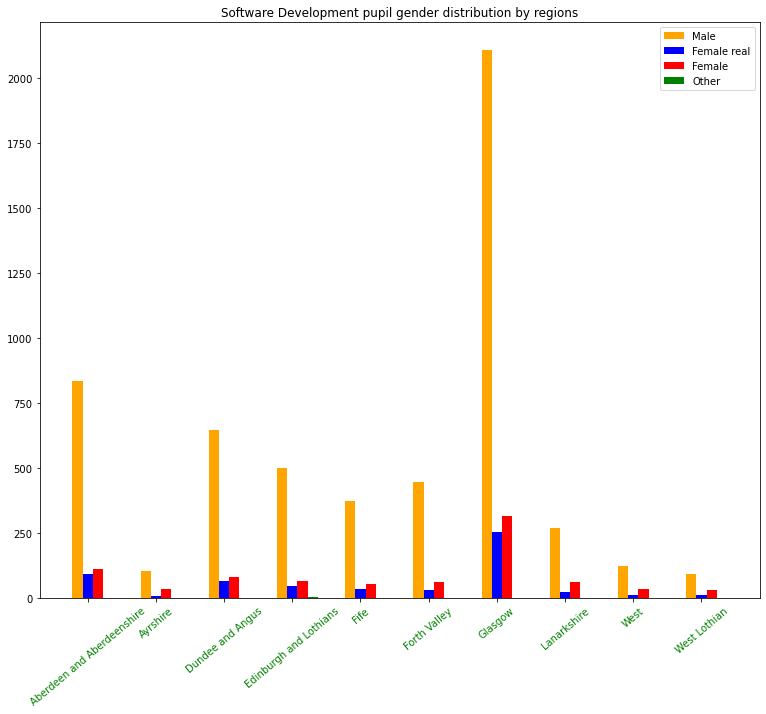

In [18]:
grouped1a = cs_renamed.groupby('region')
grouped11a= grouped1a.agg(np.sum)

fig, ax = plt.subplots(figsize =(10, 8))
ax = fig.add_axes([0,0,1,1])

index = np.arange(10) # there are 10 regions
bar_width = 0.15
width = bar_width

r11 = ax.bar(index+(bar_width*-1), grouped11a['Male'], width = bar_width, color = 'orange', label = 'Male')
r21 = ax.bar(index+(bar_width*0), grouped11a['Female real'], width = bar_width, color = 'blue', label = 'Female real')
r31 = ax.bar(index+(bar_width*1), grouped11a['Female'], width = bar_width, color = 'red', label = 'Female')
r41 = ax.bar(index+(bar_width*2), grouped11a['Inf ref/pr not say'], width = bar_width, color = 'green', label = 'Other')

ax.set_xticks(index)
ax.set_xticklabels(grouped11a.index, color = 'green', rotation=40, horizontalalignment = 'center')

plt.title('Software Development pupil gender distribution by regions', loc ='center')
plt.legend()
plt.show()

The graph shows that the main hub for learning software development is Glasgow, followed by Aberdeen, Dundee and Edinburgh. Aberdeen has been increasing its importance as a hub in this subject in the latest years.<br>

The proportion of girls vs boys by region has been calculated dividing the "Male" amounts by the "Female real" amounts:<br>

<table>
    <thead>
        <tr>
            <th>Region</th>
            <th>Proportion boys/girls real</th>
        </tr>
    </thead>
    <tbody>
        <tr>
             <td>Aberdeen and Aberdeenshire</td>
             <td>9.06</td>
        </tr>
        <tr>
             <td>Ayrshire</td>
             <td>11.55</td>
        </tr>
        <tr>
             <td>Dundee and Angus</td>
             <td>9.93</td>
        </tr>
        <tr>
             <td>Edinburgh and Lothians</td>
             <td>10.41</td>
        </tr>
        <tr>
             <td>Fife</td>
             <td>10.94</td>
        </tr>
        <tr>
             <td>Forth Valley</td>
             <td>14.87</td>
        </tr>
        <tr>
             <td>Glasgow</td>
             <td>8.3</td>
        </tr>
        <tr>
             <td>Lanarkshire</td>
             <td>10.72</td>
        </tr>
        <tr>
             <td>West</td>
             <td>8.86</td>
        </tr>
        <tr>
             <td>West Lothian</td>
             <td>8.37</td>
        </tr>
    </tbody>
</table>

The table shows the worst region, Forth Valley, with 1 girl for every 15 boys, and surprisingly, the best one is Glasgow with 1 girl for every 8.3 boys.<br> 

#### NUMBER OF BOYS/GIRLS IN SOFTWARE DEVELOPMENT COURSES BY YEAR, REGARDLESS OF THE REGION / COLLEGE<br>

The data has been grouped by year, from 2005 to 2019.<br>

It looks like the number of boys attending software development was quite constant until 2009, when the classes began to be more populated, reaching maximums from 2014 to 2017 and slightly decreasing after that. The tendency could be to decrease a little bit more in the future, depending on the job market and prospects.<br>

Regarding the number of girls, it looks like it has been more or less constant during these 15 years, with a slight increase since 2014, that could continue in the future, but always from the perspective of a few numbers.<br>

In [30]:
grouped2 = cs_renamed.groupby('Year')
grouped22= grouped2.agg(np.sum)
grouped22

,Male,Female,Inf ref/pr not say,Difference,Female real
Year,,,,,
2005,186,45,0,23,22
2006,190,45,0,22,23
2007,127,36,0,16,20
2008,199,51,0,34,17
2009,214,35,0,15,20
2010,291,53,0,20,33
2011,299,59,0,19,40
2012,331,51,0,23,28
2013,392,56,0,26,30


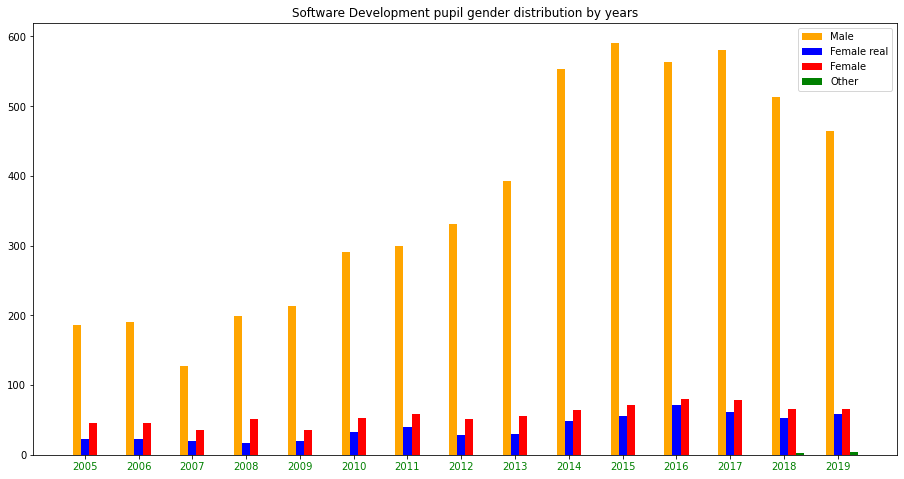

In [31]:
grouped2a = cs_renamed.groupby('Year')
grouped22a= grouped2a.agg(np.sum)
grouped22a

fig, ax = plt.subplots(figsize =(12, 6))
ax = fig.add_axes([0,0,1,1])

index = np.arange(15) # there are 15 years of data
bar_width = 0.15
width = bar_width

r1 = ax.bar(index+(bar_width*-1), grouped22a['Male'], width = bar_width, color = 'orange', label = 'Male')
r2 = ax.bar(index+(bar_width*0), grouped22a['Female real'], width = bar_width, color = 'blue', label = 'Female real')
r3 = ax.bar(index+(bar_width*1), grouped22a['Female'], width = bar_width, color = 'red', label = 'Female')
r41 = ax.bar(index+(bar_width*2), grouped22a['Inf ref/pr not say'], width = bar_width, color = 'green', label = 'Other')

ax.set_xticks(index)
ax.set_xticklabels(grouped22a.index, color = 'green', rotation=0, horizontalalignment = 'center')

plt.title('Software Development pupil gender distribution by years', loc ='center')
plt.legend()
plt.show()

#### NUMBER OF BOYS/GIRLS IN SOFTWARE DEVELOPMENT COURSES BY COLLEGE, REGARDLESS OF THE REGION / YEAR<br>

The data shows the total number of boys/girls that attended courses in Software Development in the last 15 years, shown by college totals.<br>

In [19]:
grouped3 = cs_renamed.groupby('college')
grouped33= grouped3.agg(np.sum)
grouped33

,Male,Female,Inf ref/pr not say,Difference,Female real
college,,,,,
Aberdeen College,312,50,0,15,35
Adam Smith College,71,20,0,13,7
Anniesland College,39,10,0,6,4
Ayrshire College,7,5,0,4,1
Banff & Buchan C,17,10,0,1,9
Banff and Buchan,41,5,0,3,2
Cardonald College,268,45,0,19,26
Carnegie College,5,5,0,5,0
Central Glasgow,93,16,0,1,15


29 colleges offered Software Development in the last 15 years of data history, a lot more than the number of colleges that offered Web Development. However, some college names seem to be duplicated:<br>

- Forth Valley Col<br>
- Forth Valley Colle<br>

and<br>

- Banff & Buchan C<br>
- Banff and Buchan<br>

Both sets will be unified as "Forth Valley Coll" and "Banff & Buchan Coll" respectively.<br>

In [24]:
# Replace duplicated names of colleges
cs_renamed['college'] =  cs_renamed['college'].replace(['Forth Valley Col'], 'Forth Valley Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Forth Valley Colle'], 'Forth Valley Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Banff & Buchan C'], 'Banff & Buchan Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Banff and Buchan'], 'Banff & Buchan Coll')

Performing again the grouping, it shows the correct amount of colleges, without duplicate names.<br>
The amount of students, boys and girls is the total of attendees from 2005 to 2019 (15 years) for every college. <br>

As we can see below, for example Aberdeen College had 312 boys and 35 girls attending lessons in software Development in 15 years. That is a proportion of 1:8.9.<br>

In [25]:
grouped3a = cs_renamed.groupby('college')
grouped33a= grouped3a.agg(np.sum)
grouped33a

,Male,Female,Inf ref/pr not say,Difference,Female real
college,,,,,
Aberdeen College,312,50,0,15,35
Adam Smith College,71,20,0,13,7
Anniesland College,39,10,0,6,4
Ayrshire College,7,5,0,4,1
Banff & Buchan Coll,58,15,0,4,11
Cardonald College,268,45,0,19,26
Carnegie College,5,5,0,5,0
Central Glasgow,93,16,0,1,15
City of Glasg Coll,779,85,0,0,85


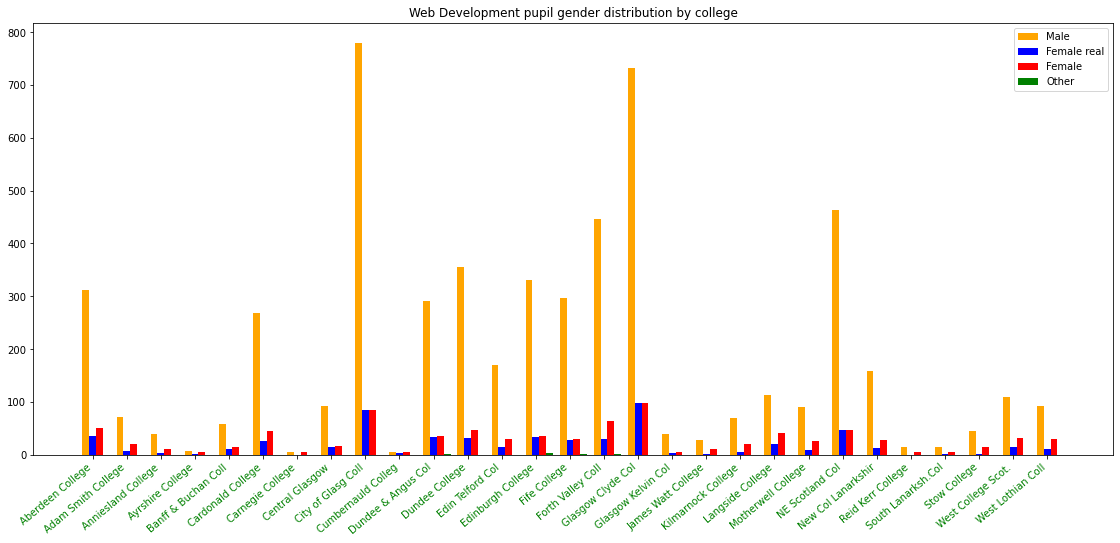

In [29]:
grouped3b = cs_renamed.groupby('college')
grouped33b= grouped3b.agg(np.sum)

fig, ax = plt.subplots(figsize =(15, 6))
ax = fig.add_axes([0,0,1,1])

index = np.arange(29) # there are 29 colleges
bar_width = 0.2
width = bar_width

r11 = ax.bar(index+(bar_width*-1), grouped33b['Male'], width = bar_width, color = 'orange', label = 'Male')
r21 = ax.bar(index+(bar_width*0), grouped33b['Female real'], width = bar_width, color = 'blue', label = 'Female real')
r31 = ax.bar(index+(bar_width*1), grouped33b['Female'], width = bar_width, color = 'red', label = 'Female')
r41 = ax.bar(index+(bar_width*2), grouped33a['Inf ref/pr not say'], width = bar_width, color = 'green', label = 'Other')

ax.set_xticks(index)
ax.set_xticklabels(grouped33b.index, color = 'green', rotation=40, horizontalalignment = 'right')

plt.title('Web Development pupil gender distribution by college', loc ='center')
plt.legend()
plt.show()

The main colleges that offer Software Development as a HND are:<br>

 - City of Glasgow College<br>
 - Glasgow Clyde College<br>
 - NE Scotland College<br>
 - Forth Valley College<br>

The proportion of girls vs boys in these colleges is approximately 1:8 to 1:15.<br>

### <span style="color:blue">**CONCLUSIONS**</span><br>

There are several points worth mentioning:<br>

1. More colleges offered Software Development than Web Development and Digital Design in the last 15 years. However, the proportion of boys and girls attending those courses is bigger in Sofware Development than in Web Development.<br>

2. Students in the categories "Other" and "Inf ref/pr not say", appeared only in 2018 and 2019 and with a high frequency of "5"s in the complex query (total of 40 students). After balancing the totals, the calculations left 7 students in these categories. Due to this, the numbers are negligible and do not appear in the majority of the plots, even being plotted. More comments can be read in the report.<br>

3. The differences between the totals of both queries in Infact are more apparent when looking at the graph of the colleges. The high number of boys hides the small number of girls at the bottom (modified numbers from the basic query are in blue, not modified from the complex query in red). More than half of the colleges have differences in totals of more than 10 students (Forth Valley College for example, has 20). <br>

The origin of these differences is unknown and it does not help the fact that girls continue to be underrepresented in IT courses in colleges.<br>